**Laboratorio de métodos cuantitativos aplicados a la Gestión**

---


Clase 7- Programación lineal en Python

¿Qué vamos a poder hacer?

🧮 Resolver problemas de optimización organizacional

🧩 Formular modelos para objetivos empresariales e interpretar soluciones óptimas.


In [1]:
#importamos las librerías que vamos a usar en esta ocasión
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import pulp

**Repaso**:

En cualquier empresa, muchas de las decisiones que se toman tienen por objeto hacer el mejor uso posible (optimización) de los recursos de la misma.
🤔 Por recursos de una empresa entendemos la maquinaria que ésta posea, sus trabajadores, capital financiero, instalaciones y materias primas.  Tales recursos pueden ser usados para fabricar productos o servicios.

**La Programación Lineal es un modelo matemático diseñado para ayudar en la planificación y toma de decisiones referentes a la asignación de los recursos.**

▶ En cada problema de programación lineal se deben tomar decisiones de maximización o minimización de objetivos representados por funciones lineales, las cuales están sujetas a determinadas condiciones llamadas restricciones, que se representan a través de ecuaciones y/o desigualdades también lineales.

Ejemplo: Si una compañía produce cuatro bienes diferentes, la dirección puede usar Programación Lineal para determinar las cantidades de recursos que asigna a la producción de cada uno de ellos (podría optar por hacer una asignación ponderada, dedicar todos los recursos a la producción de un único bien abandonando la producción del resto, etc.).  


En el CBC aprendimos el método Simplex y también un método gráfico. Vamos a ver qué herramientas nos provee este lenguaje de programación para optimizar.

# Linprog

▶La librería Scipy tiene la función Linprog que resuleve problemas de optimización.

Supongamos que queremos minimizar la siguiente función: $2x_1+2x_2$ sujeta a $x_1=x_2/3$ y $x_1+x_2=20$

### 📚 Cómo usar LinProg de SciPy - Ejemplo introductorio

**LinProg** es la función de SciPy para resolver problemas de programación lineal. Sigue estos pasos:

1. **🎯 Definir la función objetivo**: Los coeficientes en formato lista
2. **📏 Establecer restricciones**: Matriz de coeficientes y vector de constantes
3. **⚡ Resolver**: Llamar a `linprog()` con los parámetros
4. **📊 Interpretar**: Analizar el objeto resultado

**Recordatorio importante**: LinProg **siempre minimiza**, para maximizar usamos coeficientes negativos.

In [2]:
# EJEMPLO INTRODUCTORIO: Minimizar 2x₁ + 2x₂ sujeto a restricciones

# PASO 1: Definir los coeficientes de la función objetivo
# La función objetivo es: 2x₁ + 2x₂ (queremos minimizar)
# LinProg espera una lista con los coeficientes [coef_x1, coef_x2]
c = [2, 2]  # Lista con coeficientes: 2 para x₁ y 2 para x₂

# PASO 2: Definir la matriz de coeficientes de las restricciones
# Restricción 1: x₁ = x₂/3  =>  x₁ - (1/3)x₂ = 0  =>  1*x₁ + (-1/3)*x₂ = 0
# Restricción 2: x₁ + x₂ = 20  =>  1*x₁ + 1*x₂ = 20
# Cada fila representa una restricción, cada columna una variable
A = [[1, -1/3],    # Coeficientes de la primera restricción: [1, -1/3]
     [1, 1]]       # Coeficientes de la segunda restricción: [1, 1]

# PASO 3: Definir el vector de constantes (lado derecho de las restricciones)
# b[0] = 0 corresponde a la primera restricción (x₁ - x₂/3 = 0)
# b[1] = 20 corresponde a la segunda restricción (x₁ + x₂ = 20)
b = [0, 20]  # Vector de términos independientes

# PASO 4: Resolver el problema de optimización
# linprog(c, A, b) busca el mínimo de c·x sujeto a A·x = b
# El resultado se guarda en un objeto con múltiples atributos
res = linprog(c, A, b)

# PASO 5: Mostrar el resultado completo
# res contiene: solución óptima (x), valor óptimo (fun), estado (success), etc.
res

       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 2.000e+00  2.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 0.000e+00  2.000e+01]
                marginals: [-0.000e+00 -0.000e+00]

## Caso 1

Una fábrica produce dos productos, $x_1$ y
$𝑥_2$

La empresa quiere maximizar la cantidad total producida, es decir:

Maximizar
$𝑍=𝑥_1+x_2$

Sin embargo, enfrenta dos restricciones:

Cada producto $x_1$	consume 2 horas de máquina A y cada producto $𝑥_2$ consume 1 hora de máquina A. Solo hay 100 horas disponibles de máquina A.

Cada producto $𝑥_1$ consume 1 hora de máquina B y cada producto $x_2$ consume 1 hora de máquina B. Solo hay 80 horas disponibles de máquina B.

### 🔧 Cómo resolver con LinProg - Caso de Maximización

Para problemas de **maximización** con LinProg necesitamos:

1. **🔄 Convertir a minimización**: Usar coeficientes negativos en la función objetivo
2. **📐 Configurar restricciones**: Matriz A para coeficientes, vector b para constantes  
3. **⚙️ Definir bounds**: Especificar que las variables son no negativas
4. **⚡ Resolver y analizar**: Interpretar resultados (recordando el cambio de signo)

**Problema:** Maximizar la producción total sujeto a limitaciones de recursos.

In [3]:
# PROBLEMA: Maximizar Z = x₁ + x₂ (producción total)
# RESTRICCIONES:
#   2x₁ + x₂ ≤ 100  (horas de máquina A disponibles)
#   x₁ + x₂ ≤ 80    (horas de máquina B disponibles)  
#   x₁, x₂ ≥ 0      (no se puede producir cantidades negativas)

# PASO 1: Convertir maximización a minimización
# LinProg siempre minimiza, entonces para maximizar Z = x₁ + x₂
# minimizamos -Z = -x₁ - x₂ (usamos coeficientes negativos)
c = [-1, -1]  # Coeficientes: [-1, -1] para minimizar -(x₁ + x₂)

# PASO 2: Definir matriz de coeficientes de las restricciones
# Restricción 1: 2x₁ + 1x₂ ≤ 100  =>  coeficientes [2, 1]
# Restricción 2: 1x₁ + 1x₂ ≤ 80   =>  coeficientes [1, 1]
A = [[2, 1],     # Primera fila: coeficientes de la restricción de máquina A
     [1, 1]]     # Segunda fila: coeficientes de la restricción de máquina B

# PASO 3: Definir vector de límites (lado derecho de las desigualdades)
# b[0] = 100: límite de horas de máquina A
# b[1] = 80:  límite de horas de máquina B
b = [100, 80]

# PASO 4: Resolver el problema
# bounds=(0, None) especifica que todas las variables son ≥ 0
# LinProg por defecto trata las restricciones como igualdades (A_eq, b_eq)
# Usamos A_ub, b_ub para desigualdades ≤ (upper bound)
res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))

# PASO 5: Mostrar resultado
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -80.0
              x: [ 0.000e+00  8.000e+01]
            nit: 2
          lower:  residual: [ 0.000e+00  8.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.000e+01  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [4]:
# INTERPRETAR LOS RESULTADOS

# res.x[0] contiene el valor óptimo de la primera variable (x₁)
print("Producción óptima de x1:", res.x[0])

# res.x[1] contiene el valor óptimo de la segunda variable (x₂)  
print("Producción óptima de x2:", res.x[1])

# res.fun contiene el valor óptimo de la función objetivo minimizada
# Como minimizamos -Z, el valor máximo real de Z es -res.fun
print("Producción máxima:", -res.fun)

Producción óptima de x1: 0.0
Producción óptima de x2: 80.0
Producción máxima: 80.0


## Caso 2

Una refinería de petróleo procesa dos tipos de crudo: A y B con la finalidad de producir gas oíl, lubricantes y kerosene. Las demandas de estos
productos son al menos respectivamente 14, 10 y 8 toneladas por día.
El crudo A tiene un rendimiento de 0,2 toneladas de gas oíl, 0,10 toneladas de lubricante y 0,16 toneladas de kerosene por cada tonelada de
petróleo.
Los rendimientos del crudo B son: 0,10 toneladas de gas oíl, 0,20 toneladas de lubricante y 0,10 toneladas de kerosene.


*   Formular el modelo que permita determinar la capacidad mínima de la planta en toneladas por día de crudo a procesar.
*   Determinar gráficamente el espacio de soluciones factibles.
*   Determinar la cantidad de cada crudo a procesar y la capacidad mínima de la planta utilizando el método gráfico.




Es un problema de minimización: queremos procesar lo mínimo de crudo (A y B) cumpliendo demandas mínimas.

Objetivo:
mín   $Z= x_A +x_B$

Variables:
$x_A,x_B \geq 0$ (toneladas por día de crudo A y B.)

Restricciones:

Gasoil:      $0.2x_A+0.1x_B \geq 14\\$
Lubricantes: $0.1x_A+0.2x_B \geq 10\\$
Kerosene:    $0.16x_A+0.1x_B \geq 8\\$


### 🔧 Cómo resolver problemas con restricciones ≥ (mayor o igual)

Para problemas de **minimización** con restricciones ≥ necesitamos:

1. **🔄 Convertir restricciones**: Cambiar ≥ a ≤ multiplicando por -1
2. **📐 Usar A_ub y b_ub**: Para restricciones de desigualdad (upper bound ≤)
3. **⚙️ Especificar método**: Usar "highs" para mayor eficiencia
4. **📊 Interpretar demandas**: Verificar que se cumplan las demandas mínimas

**Problema:** Minimizar el procesamiento total de crudo cumpliendo demandas mínimas.

In [5]:
# PROBLEMA: Minimizar Z = xA + xB (procesamiento total de crudo)
# RESTRICCIONES ORIGINALES (≥):
#   0.20xA + 0.10xB ≥ 14  (demanda mínima de gas oíl)
#   0.10xA + 0.20xB ≥ 10  (demanda mínima de lubricantes)  
#   0.16xA + 0.10xB ≥ 8   (demanda mínima de kerosene)

# PASO 1: Definir función objetivo para minimización
# Queremos minimizar xA + xB (cantidad total de crudo procesado)
c = [1, 1]  # Coeficientes: [1, 1] significa minimizar 1*xA + 1*xB

# PASO 2: Convertir restricciones ≥ a restricciones ≤
# LinProg trabaja con restricciones ≤, entonces multiplicamos por -1
# 0.20xA + 0.10xB ≥ 14  =>  -0.20xA - 0.10xB ≤ -14
# 0.10xA + 0.20xB ≥ 10  =>  -0.10xA - 0.20xB ≤ -10  
# 0.16xA + 0.10xB ≥ 8   =>  -0.16xA - 0.10xB ≤ -8
A = [
    [-0.20, -0.10],  # Restricción 1 convertida: gas oíl
    [-0.10, -0.20],  # Restricción 2 convertida: lubricantes
    [-0.16, -0.10],  # Restricción 3 convertida: kerosene
]

# PASO 3: Definir vector de constantes (también con signo cambiado)
b = [-14, -10, -8]  # Términos independientes: [-14, -10, -8]

# PASO 4: Resolver el problema
# A_ub=A, b_ub=b especifica que son restricciones de desigualdad ≤ (upper bound)
# bounds=(0, None) indica que xA ≥ 0 y xB ≥ 0 (no negatividad)
# method="highs" usa el algoritmo HiGHS (más eficiente para problemas grandes)
res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="highs")

# PASO 5: Mostrar resultado completo
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 80.0
              x: [ 6.000e+01  2.000e+01]
            nit: 2
          lower:  residual: [ 6.000e+01  2.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  3.600e+00]
                 marginals: [-3.333e+00 -3.333e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [6]:
# INTERPRETAR LOS RESULTADOS DEL CASO 2

# res.success indica si se encontró una solución óptima (True/False)
print("Éxito:", res.success)

# res.x[0] contiene la cantidad óptima de crudo A a procesar
print(f"xA óptimo: {res.x[0]:.2f} t/día")

# res.x[1] contiene la cantidad óptima de crudo B a procesar  
print(f"xB óptimo: {res.x[1]:.2f} t/día")

# res.fun es el valor mínimo de la función objetivo (procesamiento total mínimo)
print(f"Procesamiento mínimo (xA + xB): {res.fun:.2f} t/día")

Éxito: True
xA óptimo: 60.00 t/día
xB óptimo: 20.00 t/día
Procesamiento mínimo (xA + xB): 80.00 t/día


### 📈 Visualización del Caso 2 - Restricciones ≥ (mayor o igual)

Para problemas con restricciones ≥, la región factible está **por encima** de las rectas:

1. **📐 Convertir a ecuaciones**: Cambiar ≥ por = para dibujar las fronteras
2. **🎯 Calcular región factible**: Usar `np.maximum` para encontrar el área válida
3. **🎨 Graficar restricciones**: Cada restricción define una frontera
4. **🌈 Sombrear hacia arriba**: La región válida está por encima de las líneas  
5. **⭐ Marcar el óptimo**: Mostrar la solución que minimiza el objetivo

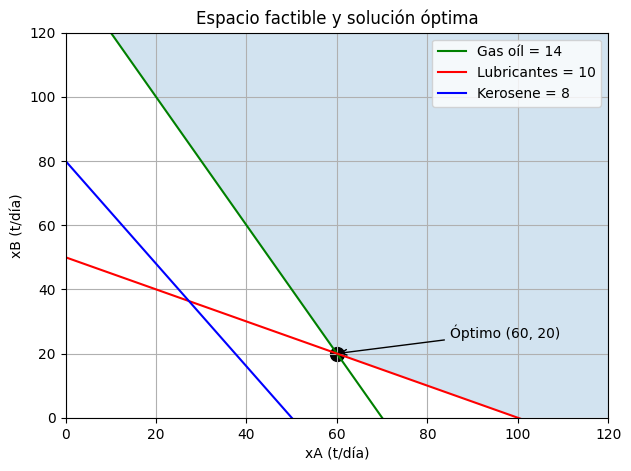

In [7]:
# PASO 1: Definir las rectas de frontera (convertir restricciones ≥ en ecuaciones =)

# Creamos un rango de valores para xA (crudo A) de 0 a 120 toneladas/día
# np.linspace(inicio, fin, cantidad_puntos) genera 400 puntos equidistantes
xA = np.linspace(0, 120, 400)

# RESTRICCIÓN 1: Gas oíl 0.20xA + 0.10xB = 14
# Despejamos xB: 0.10xB = 14 - 0.20xA  =>  xB = (14 - 0.20xA)/0.10
r1 = (14 - 0.20*xA)/0.10

# RESTRICCIÓN 2: Lubricantes 0.10xA + 0.20xB = 10  
# Despejamos xB: 0.20xB = 10 - 0.10xA  =>  xB = (10 - 0.10xA)/0.20
r2 = (10 - 0.10*xA)/0.20

# RESTRICCIÓN 3: Kerosene 0.16xA + 0.10xB = 8
# Despejamos xB: 0.10xB = 8 - 0.16xA  =>  xB = (8 - 0.16xA)/0.10
r3 = (8 - 0.16*xA)/0.10

# PASO 2: Calcular la región factible (donde se cumplen TODAS las restricciones ≥)

# Para restricciones ≥, la región factible está POR ENCIMA de todas las rectas
# np.maximum.reduce() toma el valor máximo entre todas las restricciones en cada punto
# También incluimos xB ≥ 0 usando np.zeros_like(xA)
xB_min = np.maximum.reduce([r1, r2, r3, np.zeros_like(xA)])

# PASO 3: Crear la figura y graficar las restricciones

# plt.figure() crea una nueva figura con tamaño específico (ancho=7, alto=5 pulgadas)
plt.figure(figsize=(7,5))

# plt.plot() dibuja cada línea de restricción con colores diferentes
# label= agrega texto para la leyenda identificando cada producto
plt.plot(xA, r1, label='Gas oíl = 14', color='green')     # Restricción de gas oíl
plt.plot(xA, r2, label='Lubricantes = 10', color='red')  # Restricción de lubricantes  
plt.plot(xA, r3, label='Kerosene = 8', color='blue')     # Restricción de kerosene

# PASO 4: Sombrear la región factible

# plt.fill_between() rellena el área entre dos curvas
# fill_between(xA, desde_xB, hasta_xB) sombrea desde xB_min hasta 200 (muy alto)
# alpha=0.2 hace el sombreado semitransparente para mejor visualización
plt.fill_between(xA, xB_min, 200, alpha=0.2)

# PASO 5: Marcar el punto óptimo

# plt.scatter() dibuja el punto óptimo encontrado por LinProg
# ([60], [20]) marca el punto (xA=60, xB=20) con un círculo negro grande
plt.scatter([60],[20], s=100,color='black')

# plt.annotate() agrega una etiqueta con flecha apuntando al punto óptimo
# xytext= define dónde colocar el texto, arrowprops= configura la flecha
plt.annotate("Óptimo (60, 20)", (60,20), xytext=(85,25), arrowprops=dict(arrowstyle="->"))

# CONFIGURACIÓN DEL GRÁFICO

# plt.xlim() y plt.ylim() definen los límites de los ejes
plt.xlim(0,120)  # Eje xA va de 0 a 120 toneladas/día
plt.ylim(0,120)  # Eje xB va de 0 a 120 toneladas/día

# plt.xlabel() y plt.ylabel() agregan etiquetas descriptivas a los ejes
plt.xlabel("xA (t/día)")  # Etiqueta del eje horizontal (crudo A)
plt.ylabel("xB (t/día)")  # Etiqueta del eje vertical (crudo B)

# plt.title() agrega un título descriptivo al gráfico
plt.title("Espacio factible y solución óptima")

# plt.legend() muestra una leyenda con las etiquetas de las líneas
plt.legend()

# plt.grid(True) agrega una cuadrícula para facilitar la lectura de valores
plt.grid(True)

# plt.show() muestra el gráfico final en pantalla
plt.show()


# Pulp

Una alternativa más flexible es la librería PuLP, que permite formular modelos de optimización de manera más clara (con nombres de variables y restricciones) y resolverlos con distintos solvers.

### 🔧 Configuración del Solver

Por defecto, PuLP muestra mucha información técnica del proceso de optimización (versión del solver, comandos internos, etc.). Para mantener la salida limpia y enfocada en los resultados, usamos:

```python
solver = pulp.PULP_CBC_CMD(msg=0)
prob.solve(solver)
```

Esto silencia la salida técnica y muestra solo nuestros resultados.

Supongamos que queremos maximizar $3x+5y$ sujeta a $x+2y\leq10$ y $2x+y\leq12$

### 📚 Ejemplo básico con PuLP - Sintaxis intuitiva

**PuLP** hace la programación lineal más legible y natural:

1. **🎯 Crear problema**: Especificar si es maximización o minimización
2. **📊 Definir variables**: Crear variables con nombres descriptivos
3. **🎯 Función objetivo**: Agregar directamente la expresión matemática
4. **📏 Restricciones**: Escribir las limitaciones como ecuaciones/desigualdades
5. **⚡ Resolver**: Ejecutar el solver y leer los resultados

**Ventaja**: La sintaxis es casi idéntica a la notación matemática.

In [8]:
# EJEMPLO BÁSICO: Maximizar 3x + 5y sujeto a x + 2y ≤ 10 y 2x + y ≤ 12

# PASO 1: Crear el problema de optimización
# LpProblem(nombre, tipo) crea un nuevo problema vacío
# "Problema" es solo un nombre descriptivo que elegimos
# LpMaximize indica que queremos MAXIMIZAR la función objetivo
prob = pulp.LpProblem("Problema", pulp.LpMaximize)

# PASO 2: Definir las variables de decisión
# LpVariable('nombre') crea una variable que PuLP va a optimizar
# Por defecto, las variables son ≥ 0 (no negativas)
# 'x' e 'y' son los nombres que aparecerán en los resultados
x = pulp.LpVariable('x')
y = pulp.LpVariable('y')

# PASO 3: Definir la función objetivo (lo que queremos maximizar)
# prob += expresión_matemática agrega la función objetivo al problema
# 3*x + 5*y es exactamente la expresión matemática que queremos maximizar
# "Z" es un nombre opcional para identificar la función objetivo
prob += 3*x + 5*y, "Z"

# PASO 4: Agregar las restricciones (limitaciones del problema)
# prob += restricción agrega una limitación al problema
# La sintaxis es muy similar a escribir matemática: variable operador valor

# Restricción 1: x + 2y ≤ 10
prob += x + 2*y <= 10

# Restricción 2: 2x + y ≤ 12  
prob += 2*x + y <= 12

# PASO 5: Resolver el problema de optimización
# Configuramos el solver para que no muestre información técnica (msg=0)
solver = pulp.PULP_CBC_CMD(msg=0)
# solve(solver) ejecuta el algoritmo de optimización y devuelve un código de estado
# El resultado 1 significa que se encontró una solución óptima
prob.solve(solver)



1

In [9]:
# INTERPRETAR LOS RESULTADOS DE PULP

# pulp.LpStatus[] convierte el código numérico a texto legible
# prob.status contiene el estado de la solución (1=óptimo, 0=no factible, etc.)
print("Estado:", pulp.LpStatus[prob.status])

# .varValue contiene el valor óptimo de cada variable después de resolver
# x.varValue es el valor óptimo de la variable x
print("Valor óptimo de x:", x.varValue)

# y.varValue es el valor óptimo de la variable y
print("Valor óptimo de y:", y.varValue)

# pulp.value(prob.objective) obtiene el valor óptimo de la función objetivo
# Es equivalente a evaluar 3*x.varValue + 5*y.varValue
print("Valor de la función objetivo Z:", pulp.value(prob.objective))


Estado: Optimal
Valor óptimo de x: 4.6666667
Valor óptimo de y: 2.6666667
Valor de la función objetivo Z: 27.333333600000003


## Caso 3

Una fábrica de equipos electrónicos construye amplificadores (x) y altoparlantes (y). Debido a su capacidad puede construir hasta 100 unidades diarias en total. Una convención le obliga a exportar a otras provincias la mitad de los amplificadores que fabrica y la tercera parte de los altoparlantes, pero por un problema de transporte no puede exportar más de 40 unidades por día. Cada amplificador deja un beneficio de 50 pesos y cada altoparlante deja 60 pesos.
* Plantear las restricciones y la función objetivo.  
* Determinar qué producción de amplificadores y de altoparlantes maximiza el beneficio.
* Graficar el modelo indicando el conjunto de soluciones factibles.

Vamos a maximizar la función de beneficio $Z= 50x +60y$ sujeta a
* $x+y \leq 100$ (capacidad)
* $\frac{1}{2}x+\frac{1}{3}y\leq40$ (exportación)
* $x\geq0,y\geq0$

### 📚 Cómo usar PuLP - Pasos para resolver un problema de optimización

**PuLP** nos permite formular problemas de optimización de manera intuitiva siguiendo estos 5 pasos:

1. **🎯 Crear el problema**: Definir si queremos maximizar o minimizar
2. **📊 Definir variables**: Crear las variables de decisión (x, y, etc.)
3. **🎯 Establecer función objetivo**: Qué queremos optimizar
4. **📏 Agregar restricciones**: Limitaciones que debemos cumplir
5. **⚡ Resolver**: Ejecutar el solver y obtener resultados

Veamos cada paso en detalle:

In [10]:
# PASO 1: Crear el problema de optimización
# LpProblem("nombre", tipo_optimización) crea un problema vacío
# LpMaximize indica que queremos MAXIMIZAR la función objetivo
prob = pulp.LpProblem("Caso 3", pulp.LpMaximize)

# PASO 2: Definir las variables de decisión
# LpVariable('nombre') crea una variable que PuLP va a determinar
# x = cantidad de amplificadores a producir
# y = cantidad de altoparlantes a producir
# Por defecto, las variables son >= 0 (no negativas)
x = pulp.LpVariable('x')
y = pulp.LpVariable('y')

# PASO 3: Definir la función objetivo (lo que queremos maximizar)
# prob += expresión_matemática agrega la función objetivo al problema
# 50*x + 60*y = beneficio total (50 pesos por amplificador + 60 pesos por altoparlante)
# "Z" es solo un nombre descriptivo para la función objetivo
prob += 50*x + 60*y, "Z"

# PASO 4: Agregar las restricciones (limitaciones del problema)
# prob += restricción agrega una limitación al problema

# Restricción 1: Capacidad total de producción
# x + y <= 100 (no podemos producir más de 100 unidades en total)
prob += x + y <= 100

# Restricción 2: Limitación de exportación
# 0.5*x + (1/3)*y <= 40 (exportamos 1/2 de amplificadores + 1/3 de altoparlantes <= 40)
prob += 0.5*x + 1/3*y <= 40

# Restricción 3 y 4: No negatividad (las variables deben ser >= 0)
# Aunque por defecto PuLP asume esto, es buena práctica especificarlo
prob += x >= 0
prob += y >= 0

# PASO 5: Resolver el problema
# Configuramos el solver para que no muestre información técnica (msg=0)
solver = pulp.PULP_CBC_CMD(msg=0)
# solve(solver) ejecuta el algoritmo de optimización
prob.solve(solver)

# MOSTRAR RESULTADOS
# pulp.value(prob.objective) obtiene el valor óptimo de la función objetivo
# x.varValue y y.varValue obtienen los valores óptimos de las variables
print(f'el beneficio máximo alcanzado es {pulp.value(prob.objective)} cuando se fabrican {x.varValue} amplificadores y {y.varValue} altoparlantes')


el beneficio máximo alcanzado es 6000.0 cuando se fabrican 0.0 amplificadores y 100.0 altoparlantes


/home/alexballera/Documents/uba/laboratorio-datos-fce/.venv/lib/python3.12/site-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


### 📊 Interpretación de Resultados

**Resultado obtenido:**
- **Amplificadores (x)**: 0 unidades
- **Altoparlantes (y)**: 100 unidades  
- **Beneficio máximo**: $6,000

**¿Por qué este resultado?**

1. **Mayor rentabilidad**: Los altoparlantes dan $60 vs $50 de los amplificadores
2. **Restricciones activas**: 
   - Capacidad: 0 + 100 = 100 ✅ (se usa toda la capacidad)
   - Exportación: 0.5(0) + (1/3)(100) = 33.33 < 40 ✅ (no es limitante)
3. **Decisión óptima**: Producir solo el producto más rentable hasta agotar la capacidad

**Verificación matemática:**
- Si producimos solo altoparlantes: 100 × $60 = $6,000
- Si producimos solo amplificadores: 100 × $50 = $5,000
- ¡Es lógico producir solo altoparlantes!

Vamos a visualizar la solución de esquina a la que hemos llegado en el gráfico del tercer inciso:

### 📈 Cómo crear gráficos de programación lineal - Pasos para visualizar la solución

**Matplotlib** nos permite visualizar problemas de programación lineal siguiendo estos pasos:

1. **📐 Definir las rectas de frontera**: Convertir restricciones (≤) en ecuaciones (=)
2. **🎯 Calcular la región factible**: Encontrar donde se cumplen todas las restricciones
3. **🎨 Graficar las restricciones**: Dibujar las líneas que limitan el espacio
4. **🌈 Sombrear la región**: Resaltar el área donde están las soluciones válidas
5. **⭐ Marcar el punto óptimo**: Mostrar la mejor solución encontrada

Veamos cada paso aplicado a nuestro problema:

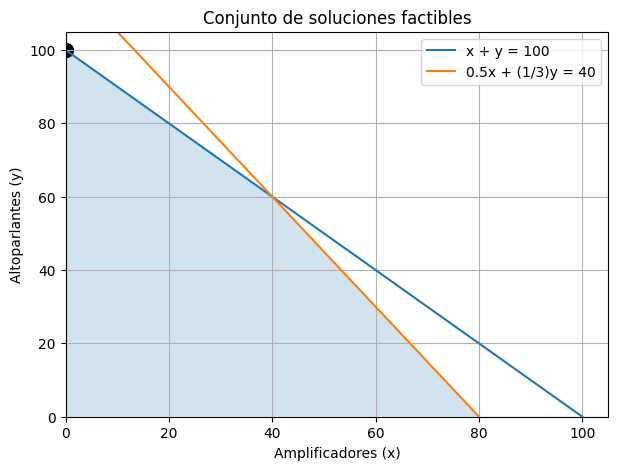

In [11]:
# PASO 1: Definir las rectas de frontera (convertir restricciones en ecuaciones)

# Creamos un rango de valores para x (amplificadores) de 0 a 100
# np.linspace(inicio, fin, cantidad_puntos) genera 400 puntos equidistantes
x = np.linspace(0, 100, 400)

# RESTRICCIÓN 1: Capacidad total x + y = 100
# Despejamos y: y = 100 - x
# Esta línea representa el límite máximo de producción total
y_cap = 100 - x

# RESTRICCIÓN 2: Exportación 0.5x + (1/3)y = 40
# Despejamos y: (1/3)y = 40 - 0.5x  =>  y = 3(40 - 0.5x) = 120 - 1.5x
# Esta línea representa el límite máximo de exportación
y_exp = 120 - 1.5*x

# PASO 2: Calcular la región factible (donde se cumplen todas las restricciones)

# np.minimum() toma el menor valor entre las dos restricciones en cada punto
# La región factible está por DEBAJO de ambas rectas (menor o igual)
y_factible = np.minimum(y_cap, y_exp)

# np.maximum() asegura que y >= 0 (no podemos producir cantidades negativas)
# La región factible también debe estar en el primer cuadrante
y_factible = np.maximum(y_factible, 0)

# PASO 3: Crear la figura y graficar las restricciones

# plt.figure() crea una nueva figura con tamaño específico (ancho=7, alto=5 pulgadas)
plt.figure(figsize=(7,5))

# plt.plot() dibuja las líneas de las restricciones
# label= agrega texto para la leyenda
plt.plot(x, y_cap, label='x + y = 100')           # Línea de capacidad total
plt.plot(x, y_exp, label='0.5x + (1/3)y = 40')   # Línea de exportación

# PASO 4: Sombrear la región factible

# plt.fill_between() rellena el área entre dos curvas
# fill_between(x, desde_y, hasta_y) sombrea desde y=0 hasta y=y_factible
# alpha=0.2 hace el sombreado semitransparente (0=transparente, 1=opaco)
plt.fill_between(x, 0, y_factible, alpha=0.2)

# PASO 5: Marcar el punto óptimo

# plt.scatter() dibuja puntos específicos en el gráfico
# ([0], [100]) marca el punto (x=0, y=100) que es nuestra solución óptima
# s=100 define el tamaño del punto, color='black' lo hace negro
plt.scatter([0],[100], s=100,color='black')

# CONFIGURACIÓN DEL GRÁFICO

# plt.xlim() y plt.ylim() definen los límites de los ejes x e y
plt.xlim(0, 105)  # Eje x va de 0 a 105 (un poco más que 100 para mejor visualización)
plt.ylim(0, 105)  # Eje y va de 0 a 105

# plt.xlabel() y plt.ylabel() agregan etiquetas a los ejes
plt.xlabel('Amplificadores (x)')      # Etiqueta del eje horizontal
plt.ylabel('Altoparlantes (y)')       # Etiqueta del eje vertical

# plt.title() agrega un título al gráfico
plt.title('Conjunto de soluciones factibles')

# plt.legend() muestra una leyenda con las etiquetas de las líneas
plt.legend()

# plt.grid(True) agrega una cuadrícula para facilitar la lectura
plt.grid(True)

# plt.show() muestra el gráfico final en pantalla
plt.show()


### 🔍 Interpretación del Gráfico

**¿Qué vemos en el gráfico?**

1. **Línea azul (x + y = 100)**: Representa el límite de capacidad de producción
   - Todo lo que está **por debajo** de esta línea cumple con la restricción de capacidad

2. **Línea naranja (0.5x + (1/3)y = 40)**: Representa el límite de exportación
   - Todo lo que está **por debajo** de esta línea cumple con la restricción de exportación

3. **Área sombreada (gris)**: La **región factible**
   - Cualquier punto dentro de esta área representa una solución válida
   - Todas las restricciones se cumplen simultáneamente

4. **Punto negro (0, 100)**: La **solución óptima**
   - Es el punto de la región factible que maximiza el beneficio
   - Está en una "esquina" de la región factible (vértice del polígono)

**¿Por qué el óptimo está en una esquina?**
En programación lineal, la solución óptima siempre está en un vértice de la región factible. Esto se debe a que la función objetivo es lineal, por lo que el máximo (o mínimo) se alcanza en los extremos de la región.

## Caso 4

Vamos a adicionar variables de elección y restricciones.

Una empresa agrícola produce trigo (x1), maíz (x2), soja (x3) y girasol (x4).
Dispone de tres recursos limitados:

* Tierra cultivable: 600 hectáreas.

* Agua para riego: 1.200 m³.

* Horas de trabajo: 1.000 horas

Cada cultivo requiere:


| Cultivo     | Tierra (ha) | Agua (m³) | Trabajo (h) | Beneficio (\$/unidad) |
| ----------- | ----------- | --------- | ----------- | --------------------- |
| Trigo (x1)  | 5           | 4         | 3           | 40                    |
| Maíz (x2)   | 3           | 2         | 5           | 50                    |
| Soja (x3)   | 2           | 5         | 2           | 60                    |
| Girasol(x4) | 5           | 3         | 4           | 55                    |


Restricciones:

El uso total de tierra no puede superar las 600 ha.

El uso total de agua no puede superar los 1.200 m³.

El trabajo total no puede superar las 1.000 h.


Tenemos que maximizar el beneficio $Z=40x_1+50x_2+60x_3+55x_4$ sujeto a

$5x_1 + 3x_2 + 2x_3 + 5x_4 \leq 600\\
4x_1 + 2x_2 + 5x_3 + 3x_4 \leq 1200\\
3x_1 + 5x_2 + 2x_3 + 4x_4 \leq 1000$

### 🔧 Caso 4: Problemas con múltiples variables - Agricultura

Para problemas con **4 variables** y **múltiples restricciones**:

1. **📊 Variables descriptivas**: Usar nombres claros (Trigo, Maiz, Soja, Girasol)
2. **⚙️ lowBound=0**: Especificar explícitamente que las variables son no negativas
3. **📏 Múltiples restricciones**: Una por cada recurso limitado (tierra, agua, trabajo)
4. **🔄 Iteración sobre variables**: Usar bucles para mostrar resultados de forma ordenada
5. **💰 Interpretación económica**: Analizar qué cultivos son más rentables

**Ventaja de PuLP**: Maneja fácilmente problemas complejos con muchas variables.

In [12]:
# PROBLEMA AGRÍCOLA: Maximizar beneficio con 4 cultivos y 3 recursos limitados
# OBJETIVO: Maximizar Z = 40x₁ + 50x₂ + 60x₃ + 55x₄ (beneficio total)
# RESTRICCIONES:
#   Tierra:  5x₁ + 3x₂ + 2x₃ + 5x₄ ≤ 600 ha
#   Agua:    4x₁ + 2x₂ + 5x₃ + 3x₄ ≤ 1200 m³  
#   Trabajo: 3x₁ + 5x₂ + 2x₃ + 4x₄ ≤ 1000 h

# PASO 1: Crear el problema de maximización
# "Problema agro" es un nombre descriptivo para identificar este problema
prob = pulp.LpProblem("Problema agro", pulp.LpMaximize)

# PASO 2: Definir las variables de decisión con nombres descriptivos
# lowBound=0 especifica explícitamente que no se pueden producir cantidades negativas
# Los nombres aparecerán en los resultados finales para facilitar la interpretación
x1 = pulp.LpVariable("Trigo", lowBound=0)     # Cantidad de trigo a producir
x2 = pulp.LpVariable("Maiz", lowBound=0)      # Cantidad de maíz a producir  
x3 = pulp.LpVariable("Soja", lowBound=0)      # Cantidad de soja a producir
x4 = pulp.LpVariable("Girasol", lowBound=0)   # Cantidad de girasol a producir

# PASO 3: Definir la función objetivo (beneficio total a maximizar)
# Cada cultivo aporta diferente beneficio por unidad producida
# 40*x1: beneficio del trigo ($40 por unidad)
# 50*x2: beneficio del maíz ($50 por unidad)  
# 60*x3: beneficio de la soja ($60 por unidad)
# 55*x4: beneficio del girasol ($55 por unidad)
prob += 40*x1 + 50*x2 + 60*x3 + 55*x4

# PASO 4: Agregar las restricciones de recursos

# Restricción 1: Limitación de tierra cultivable (600 hectáreas disponibles)
# Cada cultivo consume diferente cantidad de tierra por unidad
prob += 5*x1 + 3*x2 + 2*x3 + 5*x4 <= 600

# Restricción 2: Limitación de agua para riego (1200 m³ disponibles)  
# Cada cultivo requiere diferente cantidad de agua por unidad
prob += 4*x1 + 2*x2 + 5*x3 + 3*x4 <= 1200

# Restricción 3: Limitación de horas de trabajo (1000 horas disponibles)
# Cada cultivo demanda diferente cantidad de trabajo por unidad  
prob += 3*x1 + 5*x2 + 2*x3 + 4*x4 <= 1000

# PASO 5: Resolver el problema de optimización
# Configuramos el solver CBC para que no muestre información técnica (msg=0)
solver = pulp.PULP_CBC_CMD(msg=0)
prob.solve(solver)

# PASO 6: Mostrar los resultados de forma organizada

print("Producción óptima:")
# Iteramos sobre todas las variables del problema para mostrar sus valores óptimos
for v in prob.variables():
    # v.name contiene el nombre descriptivo ("Trigo", "Maiz", etc.)
    # v.varValue contiene la cantidad óptima a producir de cada cultivo
    print(f"{v.name} = {v.varValue}")

# pulp.value(prob.objective) calcula el beneficio máximo total alcanzable
print("Beneficio máximo =", pulp.value(prob.objective))


Producción óptima:
Girasol = 0.0
Maiz = 54.545455
Soja = 218.18182
Trigo = 0.0
Beneficio máximo = 15818.18195


# 🥇 ⚡ 🤓 Mini graficadora del espacio factible

### 🛠️ Herramienta Interactiva - Mini Graficadora de Programación Lineal

Esta herramienta te permite **experimentar** con diferentes problemas de programación lineal:

**🎯 Qué hace:**
- Solicita que ingreses tus propias restricciones
- Grafica automáticamente la región factible  
- Muestra visualmente cómo se intersectan las restricciones

**📋 Formato de entrada:**
- `a b c tipo` donde `a*x + b*y tipo c`
- Ejemplo: `2 1 10 <=` significa `2x + 1y ≤ 10`
- Tipos válidos: `<=`, `>=`, `=`

**🎨 Salida visual:**
- Líneas de colores para cada restricción
- Región factible sombreada en gris
- Cuadrícula para facilitar la lectura

**💡 Uso educativo:** Ideal para experimentar y entender cómo cambia la región factible con diferentes restricciones.

### 📋 CÓMO USAR LA HERRAMIENTA - Versión Simplificada

**🎯 MÉTODO SIMPLE:** Modifica directamente el código (no necesitas escribir en inputs)

**Problema ejemplo:** Maximizar Z = 3x + 2y sujeto a:
- x + y ≤ 8
- 2x + y ≤ 10  
- x ≥ 0, y ≥ 0

**PASOS A SEGUIR:**

**PASO 1:** Busca la lista llamada `restricciones` en el código
**PASO 2:** Modifica la lista con tus restricciones usando el formato `(a, b, c, 'tipo')`

**EJEMPLO DE MODIFICACIÓN:**
```python
restricciones = [
    (1, 1, 8, '<='),     # x + y ≤ 8
    (2, 1, 10, '<='),    # 2x + y ≤ 10
]
```

**PASO 3:** Ejecuta la celda ▶️ 
**RESULTADO:** ¡Gráfico automático con tu región factible!

---

**📐 FORMATO:** `(a, b, c, 'tipo')` donde `a*x + b*y tipo c`

**MÁS EJEMPLOS:**
- Para `3x - 2y ≥ 6` escribe: `(3, -2, 6, '>=')`
- Para `x ≤ 5` escribe: `(1, 0, 5, '<=')`  
- Para `4y = 8` escribe: `(0, 4, 8, '=')`

**VENTAJAS:**
✅ Sin problemas de input
✅ Fácil de modificar y probar
✅ Código reutilizable

### 📝 Ejemplo paso a paso - Cómo usar la herramienta

**Supongamos que queremos graficar este problema:**
- Maximizar `Z = 3x + 2y`
- Sujeto a: `x + y ≤ 8`, `2x + y ≤ 10`, `x ≥ 0`, `y ≥ 0`

**Pasos a seguir:**

1. **Pregunta:** "¿Cuántas restricciones vas a ingresar?"
   - **Respuesta:** `2` (solo contamos x+y≤8 y 2x+y≤10, las no-negatividad se asumen)

2. **Restricción 1:** "Ingresa (a b c tipo):"
   - **Respuesta:** `1 1 8 <=` (para x + y ≤ 8)

3. **Restricción 2:** "Ingresa (a b c tipo):"
   - **Respuesta:** `2 1 10 <=` (para 2x + y ≤ 10)

4. **Resultado:** Gráfico con la región factible sombreada

**¡Ahora inténtalo tú!**

🎯 MINI GRAFICADORA DE PROGRAMACIÓN LINEAL - VERSIÓN SIMPLE
👆 INSTRUCCIONES: Modifica la lista 'restricciones' debajo
   Formato: (a, b, c, 'tipo') para a*x + b*y tipo c

📊 RESTRICCIONES DEFINIDAS:
   1. 1x + 1y <= 8
   2. 2x + 1y <= 10

🎨 Procesando restricciones...


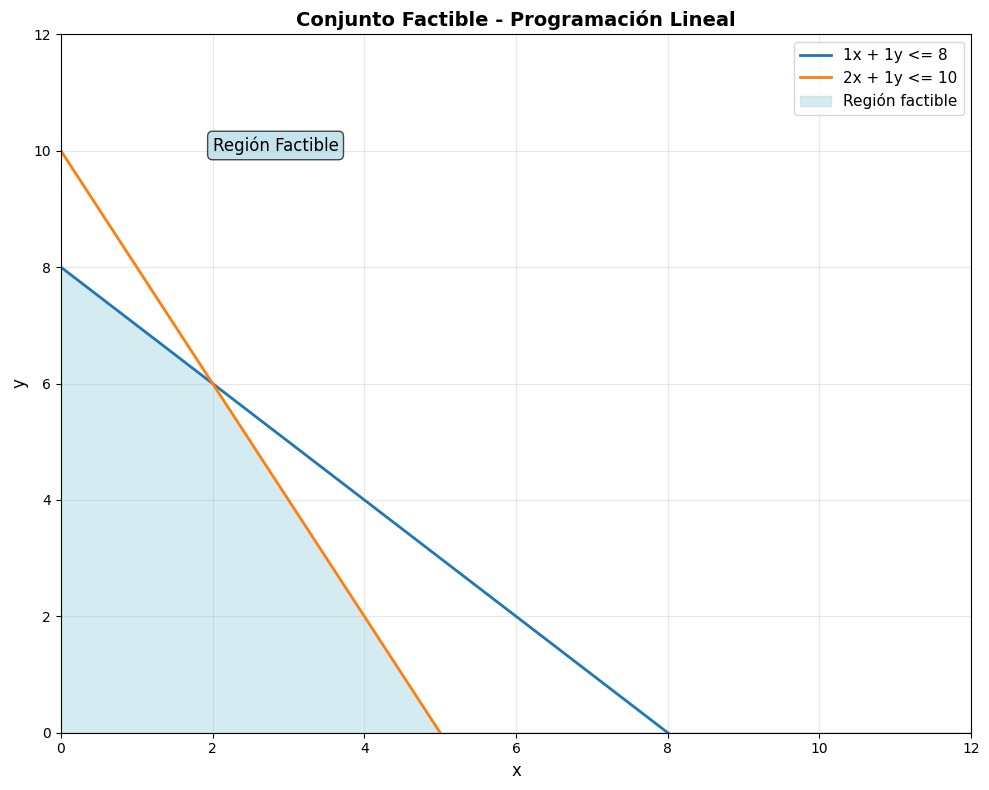

🎉 ¡GRÁFICO COMPLETADO!
📊 La región factible está sombreada en AZUL CLARO
📈 Las líneas de colores son las restricciones
✨ Cualquier punto dentro del área azul es una solución válida

🔧 PARA CAMBIAR LAS RESTRICCIONES:
   1. Modifica la lista 'restricciones' arriba
   2. Vuelve a ejecutar esta celda
   3. ¡Verás tu nuevo gráfico!


In [13]:
# VERSIÓN SIMPLIFICADA: Define tus restricciones directamente en el código

print("🎯 MINI GRAFICADORA DE PROGRAMACIÓN LINEAL - VERSIÓN SIMPLE")
print("=" * 60)
print("👆 INSTRUCCIONES: Modifica la lista 'restricciones' debajo")
print("   Formato: (a, b, c, 'tipo') para a*x + b*y tipo c")
print()

# 📝 MODIFICA ESTA LISTA CON TUS RESTRICCIONES:
# Formato: (a, b, c, 'tipo') donde representa a*x + b*y tipo c
# Ejemplos:
#   (1, 1, 8, '<=')   significa  x + y ≤ 8
#   (2, 1, 10, '<=')  significa  2x + y ≤ 10
#   (1, -1, 0, '>=')  significa  x - y ≥ 0

restricciones = [
    (1, 1, 8, '<='),     # x + y ≤ 8
    (2, 1, 10, '<='),    # 2x + y ≤ 10
]

print("📊 RESTRICCIONES DEFINIDAS:")
for i, (a, b, c, tipo) in enumerate(restricciones, 1):
    print(f"   {i}. {a}x + {b}y {tipo} {c}")
print()

# Resto del código de graficación...
x = np.linspace(0, 15, 400)
plt.figure(figsize=(10, 8))

y_todas = []

print("🎨 Procesando restricciones...")
for (a, b, c, tipo) in restricciones:
    if b != 0:
        y = (c - a*x)/b
        y_todas.append((y, tipo))
        plt.plot(x, y, label=f"{a}x + {b}y {tipo} {c}", linewidth=2)
    else:
        x_val = c/a
        plt.axvline(x_val, label=f"{a}x {tipo} {c}", color='red', linewidth=2)

# Calcular región factible
y_factible = np.full_like(x, np.inf)

for (y, tipo) in y_todas:
    if tipo == "<=":
        y_factible = np.minimum(y_factible, y)
    elif tipo == ">=":
        y_factible = np.maximum(y_factible, y)

y_factible = np.maximum(y_factible, 0)

# Graficar
plt.fill_between(x, 0, y_factible, color="lightblue", alpha=0.5, label="Región factible")

plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Conjunto Factible - Programación Lineal", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Agregar anotaciones
plt.text(2, 10, "Región Factible", fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

print("🎉 ¡GRÁFICO COMPLETADO!")
print("📊 La región factible está sombreada en AZUL CLARO")
print("📈 Las líneas de colores son las restricciones")
print("✨ Cualquier punto dentro del área azul es una solución válida")
print()
print("🔧 PARA CAMBIAR LAS RESTRICCIONES:")
print("   1. Modifica la lista 'restricciones' arriba")
print("   2. Vuelve a ejecutar esta celda")
print("   3. ¡Verás tu nuevo gráfico!")


# Comparemos Pulp y Linprog

## 📊 Comparación entre `linprog` (SciPy) y `PuLP`

| Aspecto | `linprog` (SciPy) | `PuLP` |
|---------|------------------|--------|
| **Enfoque** | Pensado para **resolver rápido** problemas de optimización. | Pensado para **formular modelos de forma clara** y cercana a la notación matemática. |
| **Forma de uso** | Siempre **minimiza**, por lo que para maximizar hay que invertir el signo de la función objetivo. | Permite elegir **Maximize** o **Minimize** explícitamente. |
| **Sintaxis** | Se trabaja con **listas/matrices** de coeficientes (más algebraico, menos intuitivo para principiantes). | Se trabaja con **objetos y restricciones declaradas** (más legible y didáctico). |
| **Interpretación de resultados** | Retorna un objeto con atributos (ej. `res.x`, `res.fun`). | Las variables tienen valores asignados directamente (ej. `x.value()`). |



-Actividad propuesta:
Una panadería produce pan y medialunas,
Un pan requiere 1 hora de horno y 0.5h de mano de obra, una medialuna requiere 2 horas de horno y 1h de mano de obra. Disponibilidad: 160 horas de horno, 90h de mano de obra. Ganancias: 50 pesos el pan, 80 pesos la medialuna.
* Encontrar el beneficio máximo.
* Formular otro problema de optimización para una panadería que produce pan y medialunas y resolverlo, incluyendo un gráfico del conjunto de soluciones factibles.


Fuentes:

Notas de álgebra teórico-prácticas: cátedra de Álgebra / Alicia Delia Fraquelli;Andrea Leonor Gache. - 1a ed. - Ciudad Autónoma de Buenos Aires: Universidad de Buenos Aires. Facultad de Ciencias Económicas, 2019.

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O’Reilly Media.

James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning: with Applications in Python. Springer.